In [1]:
%matplotlib inline

from helper_function1 import *
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC
import pickle
from IPython.display import display
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

'output_frames/40.png'

(720, 1280, 3)


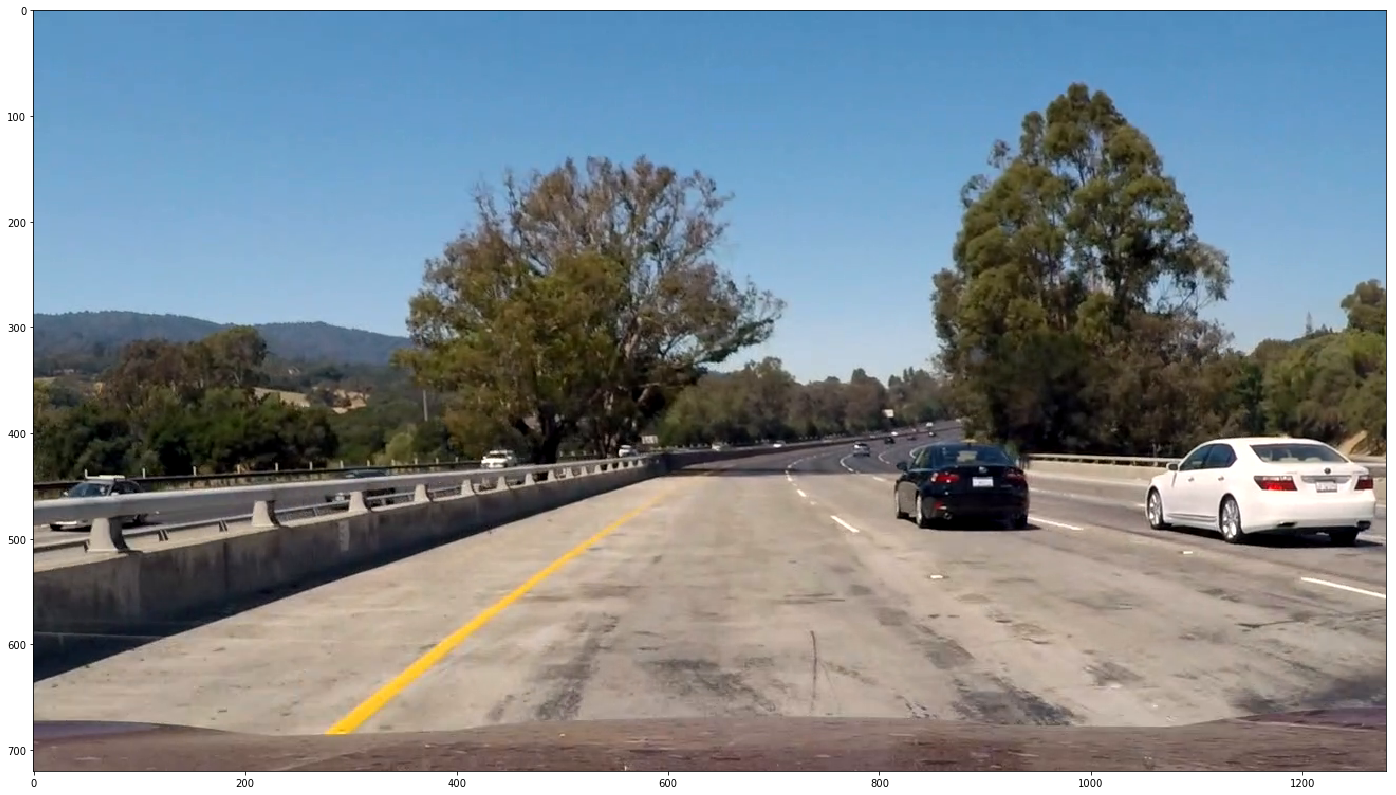

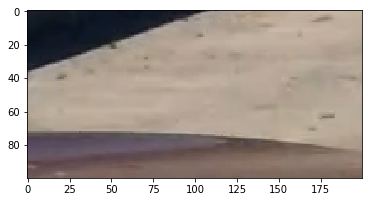

In [2]:
test_img="output_frames/40.png"

display(test_img)
img=mpimg.imread(test_img)
plt.figure(figsize=(25,14))
plt.imshow(img)
print(img.shape)

plt.figure()
plt.imshow(img[600:700, 0:200])

In [3]:
# Load trained classifier 

clf = pickle.load(open('trained_classifier.pkl', 'rb'))
print(clf)
X_scaler = pickle.load(open('x_scaler.pkl', 'rb'))

LinearSVC(C=0.0021544346900318843, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)


In [4]:
color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 700] # Min and max in y to search in slide_window()

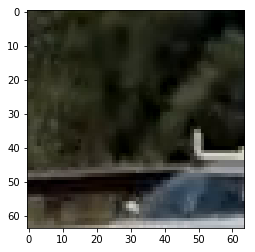

In [5]:
# Extract segments from image

#output format ((startx, starty), (endx, endy))
windows = slide_window(img, y_start_stop=y_start_stop)
#print(windows)
first = windows[0]
plt.imshow(img[first[0][1]:first[1][1], first[0][0]:first[1][0]])

In [10]:
selected_windows = []


for window in windows:
    image_window = extract_image_window(img, window)
    image_features = extract_features_for_one_image(image_window, color_space, spatial_size,
                        hist_bins, orient, 
                        pix_per_cell, cell_per_block, hog_channel,
                        spatial_feat, hist_feat, hog_feat)
    #print(image_features.shape)
    image_features = image_features.reshape(1, -1)
    scaled_features = X_scaler.transform(image_features)
    prediction = clf.predict(scaled_features)
    if prediction == 1:
        selected_windows.append(window)

In [11]:
print(len(selected_windows))

5


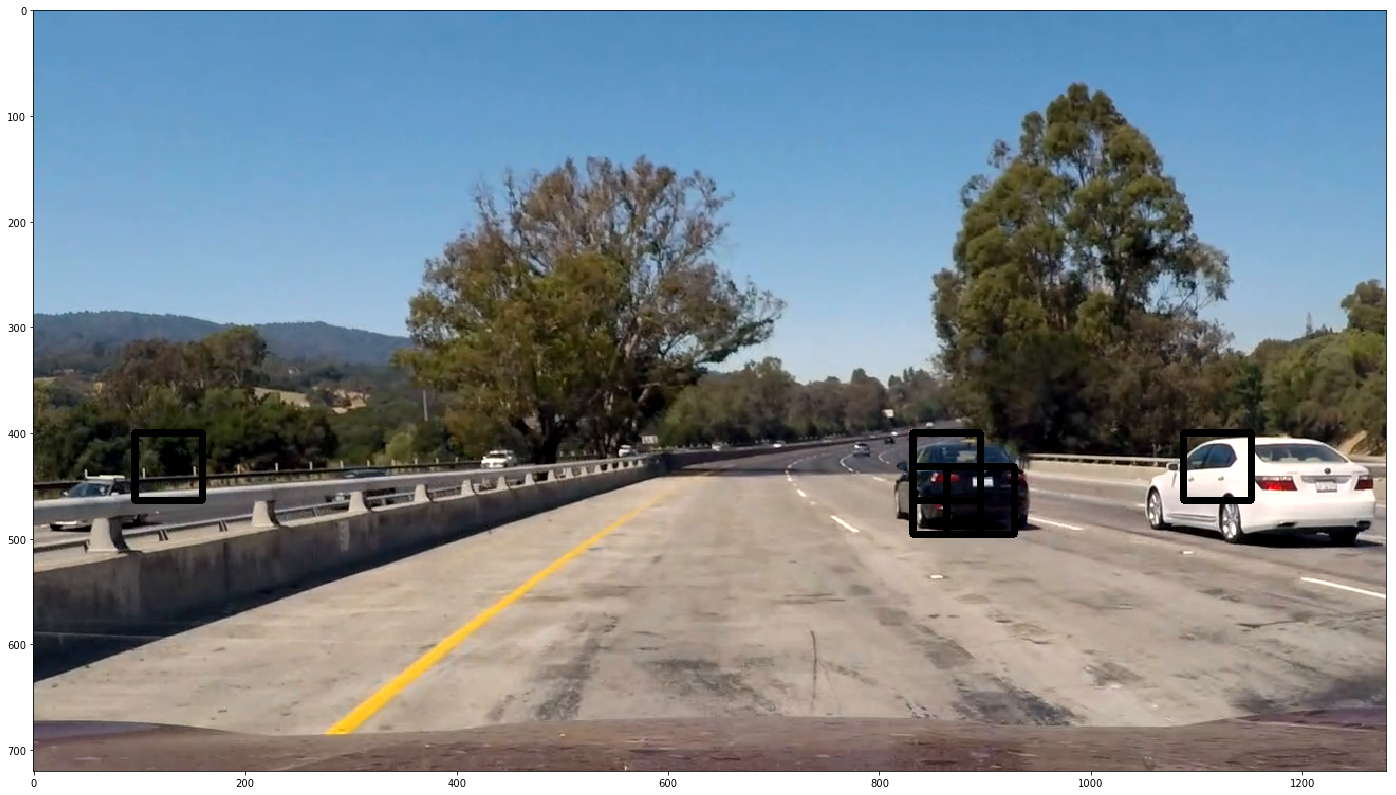

In [14]:
# Draw windows

img_copy = draw_boxes(img, selected_windows)
plt.figure(figsize=(25, 14))
plt.imshow(img_copy)